# Интернет-магазин компьютерных игр «Стримчик»   
##### (продажи по всему миру)  

  
#### `Задача:`  Выявление закономерностей, определяющих успешность компьютерных игр.    

#### `Цель:`  Cделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 г.
  
#### `Цель исследования:`  Отработка принципов работы с данными.     
  
#### `Данные:`  Из открытых источников доступны исторические данные до 2016 года (2016 м.б.неполным) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  В наборе данных категоризация по ESRB: «Для взрослых», «Для детей младшего возраста» или «Для подростков». 
  

  ##### `Описание данных:`  
  
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.    
  
 
#### `Требования к исследованию:`

Подготовить данные
  
Провести исследовательский анализ данных  
  
Составить портрет пользователя каждого региона  
  
Проверить гипотезы

## Часть 1. Изучение общей информации

### Загрузка данных

In [50]:
# импорт необходимых в исследовании библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st

# не показывать предупреждения
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')

In [51]:
# открытие файла
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv') 
sns.set() 

In [52]:
# видеть все колонки
pd.options.display.max_columns = 100  

### Изучение данных

In [53]:
# функция для изучения данных
def df_analysis(df):
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Вывод 2 строк таблицы с начала и с конца с заголовками')
    display(data.head(2), data.tail(2))
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Запрос всех атрибутов')
    print(' ')
    print(data.info())
    print('_________________________________________________________________________________________________________')    
    print(' ')
    print('Числовое описание данных')
    print(' ')
    print(data.describe().T.round(1))
    print('_________________________________________________________________________________________________________') 
    print(' ')
    print('Пропущенные значения')
    print(' ')
    data_pass = pd.DataFrame(data.isna().sum().sort_values(ascending=False))
    data_pass.columns = ['pass']
    data_pass['perc, %'] = (data_pass['pass']/len(data)*100).round(1) 
    print(data_pass) 
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Количество явных дубликатов')
    print(' ')
    print(data.duplicated().sum())
    print('_________________________________________________________________________________________________________')
    print(' ')
    print('Общая обзорная гистограмма для столбцов с числовыми данными')
    print(' ')
    data.hist(figsize=(15, 10))
    plt.show()
    print('_________________________________________________________________________________________________________')

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.0,0.01,0.0,NaN,NaN,NaN


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
________________________________________________________________________________________________________

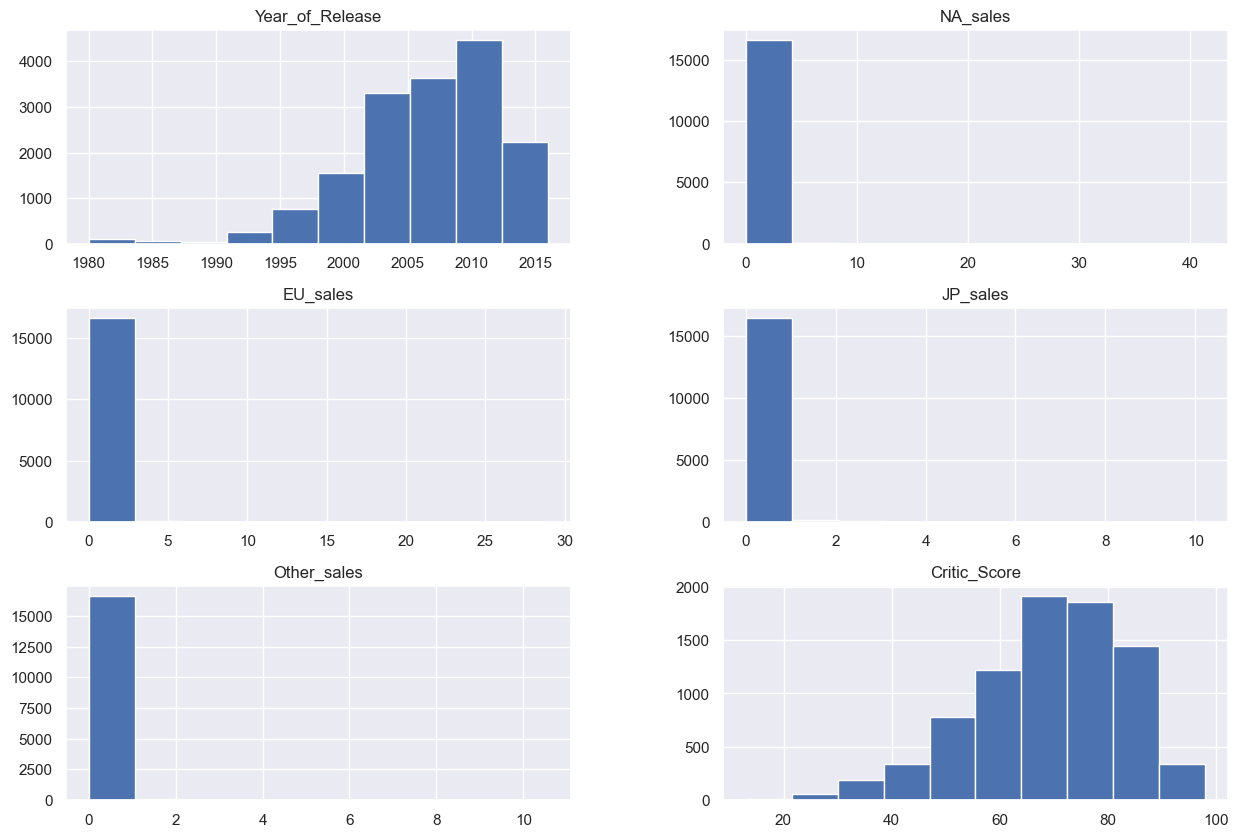

_________________________________________________________________________________________________________


In [54]:
df_analysis(data)

### Вывод по data:

- явные дубликаты отсутствуют  
- заголовки необходимо привести к нижнему регистру  
- Year_of_Release привести в формат целого числа 
- обработать пропущенные значения  

## Часть 2. Подготовка данных

### Предобработка данных 

#### Замена названий столбцов приведением к нижнему регистру

In [55]:
data.columns = data.columns.str.lower()
data.columns # список названий всех столбцов - проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Описание пропущенных значений и работа с ними  
  
**critic_score** — оценка критиков (максимум 100) - 51.3% - заменены значением 'no_value'  
**rating** — рейтинг от организации ESRB - 40.5% - заменены значением 'no_value'  
**user_score** — оценка пользователей (максимум 10) - 40.1% - заменены значением 'no_value'  
**year_of_release** — год выпуска - 1.6% - заменены значением 1979  
**name** — название игры - 0.01% - удалены  
**genre** — жанр игры - 0.01% - удалены  
  
При доле пропусков менее 5% для экономии времени их можно удалить.

In [56]:
data = data.dropna(subset=['name', 'genre']) # удаление строк с пропущенными значениями

В параметрах "имя" и "жанр" по 2 пропуска, причины пропусков - или техническая потеря данных, или не внесено пользователем. На итоговые вычисления никак не повлияет, поэтому проще от них избавиться.

In [57]:
# код для просмотра уникальных значений
a = data['user_score'].unique()
display(a)
#display(sorted(a))

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [58]:
# вспомогательный код для выявления причин пропущенных данных
ab = pd.pivot_table(data, index='year_of_release', values='user_score', aggfunc=['count']) 
bc = pd.pivot_table(data, index='year_of_release', values='platform', aggfunc=['count']) 
#display(ab)
#display(bc)

`tbd` означает `To Be Determined`, т.к. игра ещё не выпущена. Тут можно заменить заглушкой, а можно привести в nan.

In [59]:
data['rating'] = data['rating'].fillna('no_value') #  изменение пропущенных значений рейтинга на "нет значения"
data['year_of_release'] = data['year_of_release'].fillna(1979) #  изменение пропущенных значений года релиза на 1979
data['critic_score'] = data['critic_score'].fillna('no_value') #  именение пропущенных значений оценки критиков на "нет значения"  
data['user_score'] = data['user_score'].fillna('no_value') #  изменение пропущенных значений оценки пользователей на "нет значения" 
data.user_score = data.user_score.str.replace('tbd', 'nan')# замена значения оценки пользователей 'tbd' на "нет значения" 

**Рейтинг** - формат "object", причины пропусков - до 2000 г. практически не заполнялись данные. Нет смысла ни удалять, ни заменять на 0, пропущенные значения обозначены как "no_value".  
**Год выпуска** предварительно решено заменить на 1979 год, предыдущий перед годом, с которого начинается заполнение, а не удалять, т.к. 1,6% данных результаты не смажут, а, возможно, дополнят картину общих вычислений.  
**Оценка критиков и пользователей**, причины пропусков - до 2000 г. практически не заполнялись данные. Пропуски НЕ заменены на 0, чтобы (возможно) не искажать медианные значения в предстоящем исследовании, обозначены как "no_value" (тем более у пользователей в исходных данных оценка 0 имеется).  
**Оценка пользователей** - обнаружена оценка 'tbd', это аббревиатура (To Be Determined), которая имеет смысл "Будет определено", заменена на "no_value". 

#### Преобразование типов данных

In [60]:
# год релиза преобразуем в целочисленное значение
data['year_of_release'] = data['year_of_release'].astype('int')

Год выпуска - все значения числовые, без десятичных дробных значений, логичнее чтобы параметр имел тип int.

#### Добавление параметра "Cуммарные продажи во всех регионах"

In [61]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,no_value,no_value,no_value,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,no_value,no_value,no_value,31.38


**ВЫВОД ПО БЛОКУ:**  
- В целом данные адекватные, можно проводить аналитику  
- Названия столбцов датафрейма приведены к нижнему регисту 
- Для удобства откорректирован тип данных в параметре "year_of_release" (формат int)  
- Описаны и обработаны пропущенные значения в параметрах: rating, year_of_release, critic_score, user_score  
- Потерь в виде удалённых строк нет (0,01% - ничтожное значение)  
- При первичном изучении и последующей обработке данных видно, что в данном датафрейме аномальных значений нет и соответствующая работа не требуется  
- Добавлен параметр "Cуммарные продажи во всех регионах", это количество проданных копий по всему миру в млн шт


## Часть 3. Исследовательский анализ данных.

#### Количество игр в разные годы

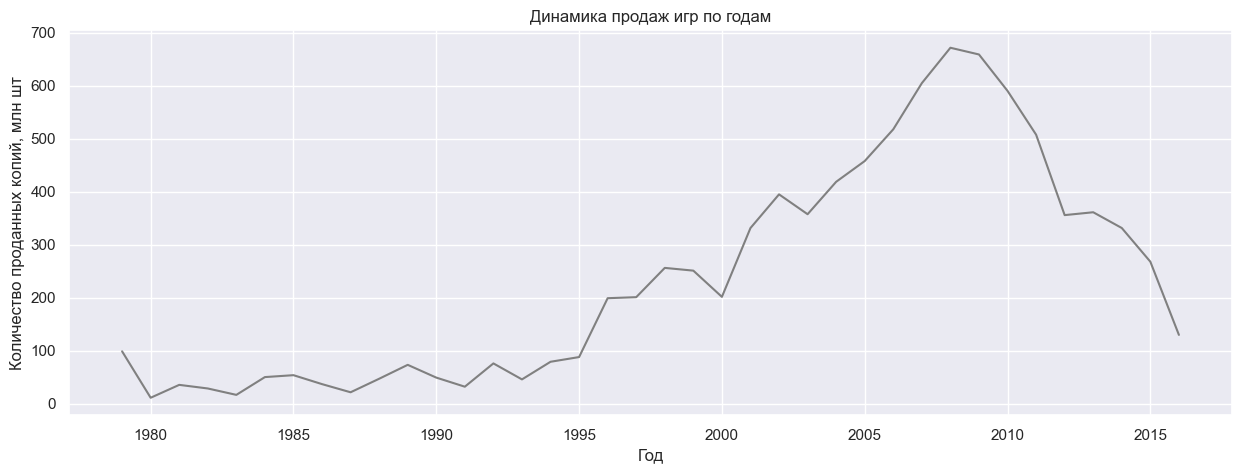

,sum
year_of_release,
1979,98.92
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35
1985,53.95
1986,37.08
1987,21.70


In [62]:
sum_of_games = data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
plt.figure(figsize=(15, 5))
(sns.lineplot(data = sum_of_games, x = sum_of_games.index, y = 'total_sales', color = 'grey')
    .set(title = 'Динамика продаж игр по годам', xlabel = 'Год', ylabel = 'Количество проданных копий, млн шт'))
plt.show()

sales_ye = pd.pivot_table(data, index='year_of_release', values='total_sales', aggfunc=['sum'])
sales_ye.columns = ['sum']
display(sales_ye)

<Axes: >

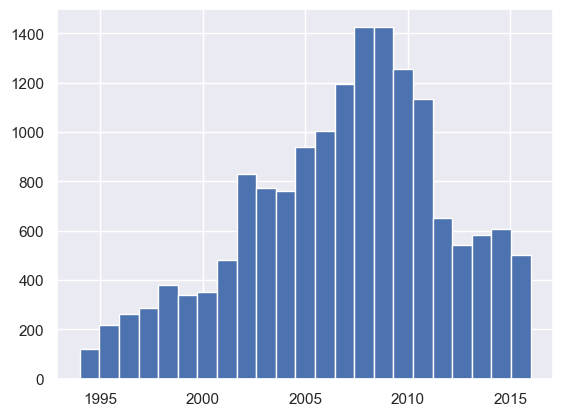

In [63]:
data['year_of_release'].hist(bins = 23, range=(1994, 2016))

C 1980 - 1995 гг. распространённость компьютерных игр в мире ещё была низкой, что отражается на графике. Существенный рост наблюдается с 1995 года. В 2007 - 2011гг. пик популярности, в 2012 снижение, далее количество сохраняются примерно на одном уровне. Наиболее показательным считаю смотреть период с 1995 по 2016 гг. 

#### Продажи по платформам.

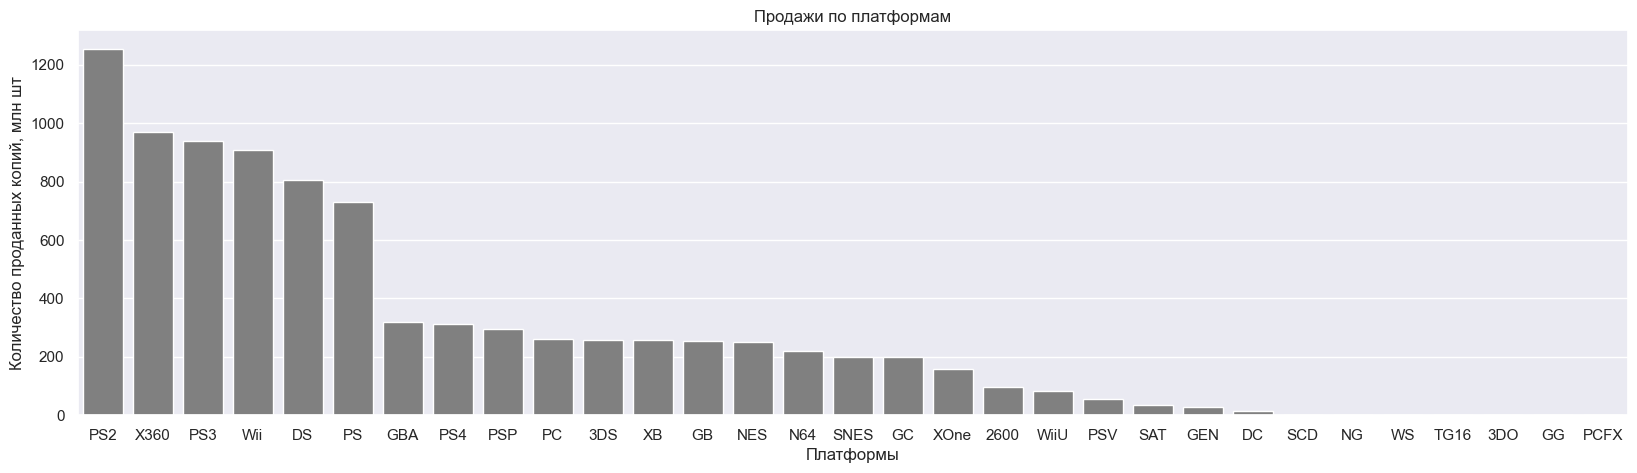

,sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [64]:
# общая визуализация для всех платформ
platform_sales = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(20, 5))
(sns.barplot(data = platform_sales, x = platform_sales.index, y = 'total_sales', color = 'grey')
    .set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Количество проданных копий, млн шт'))
plt.show()

sales_pl = pd.pivot_table(data, index='platform', values='total_sales', aggfunc=['sum'])
sales_pl.columns = ['sum']
display(sales_pl.sort_values('sum', ascending=False))

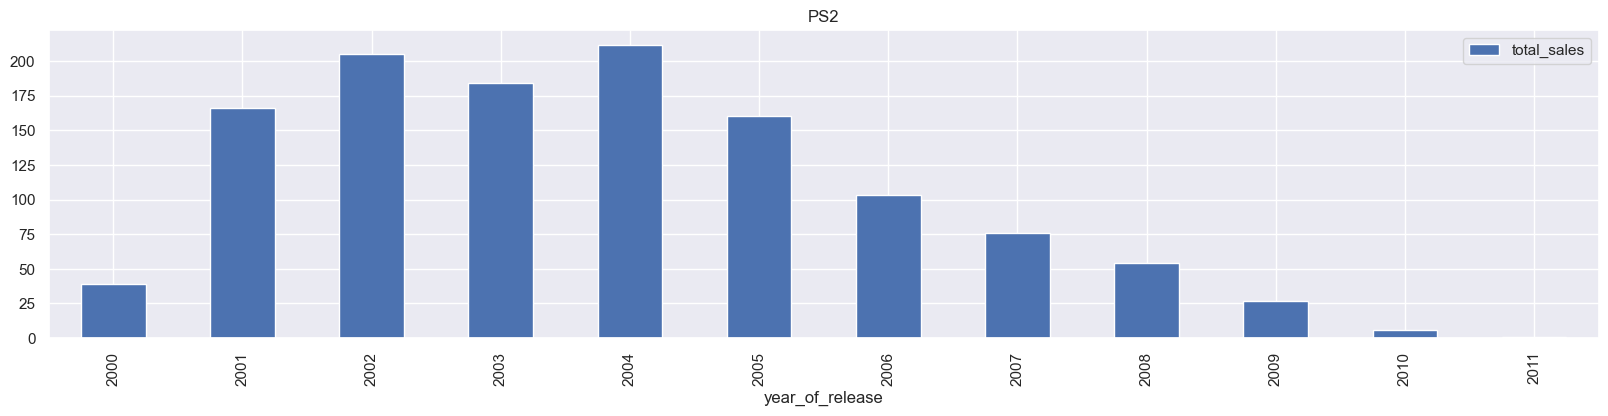

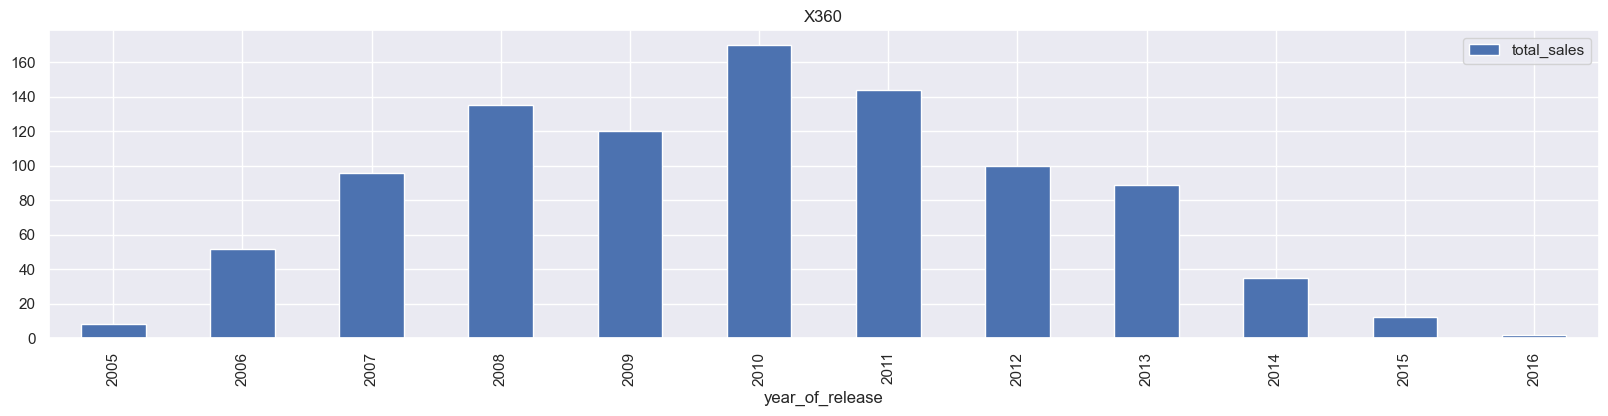

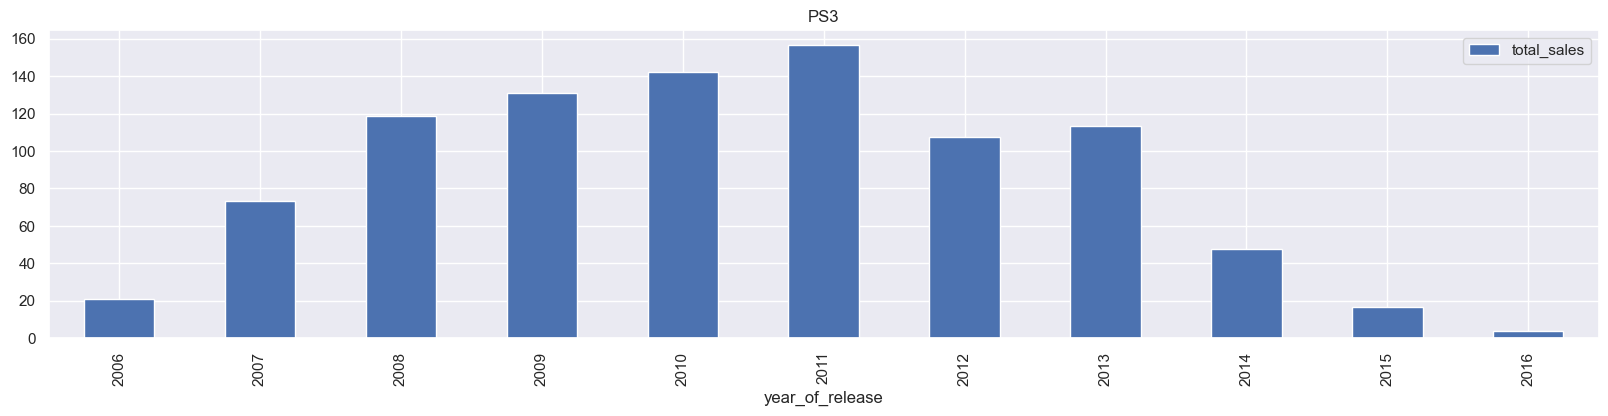

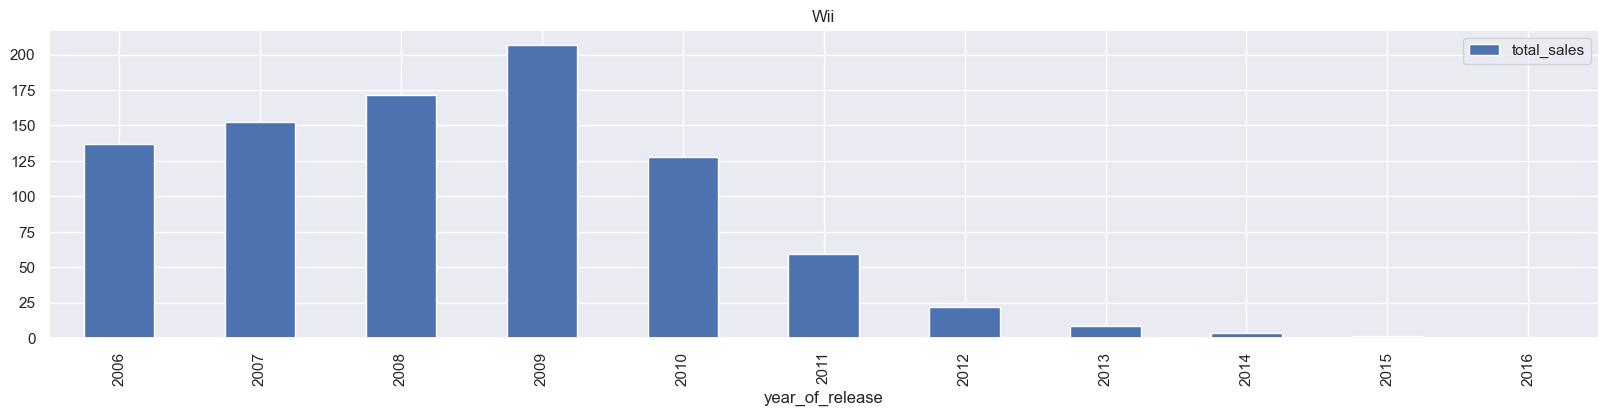

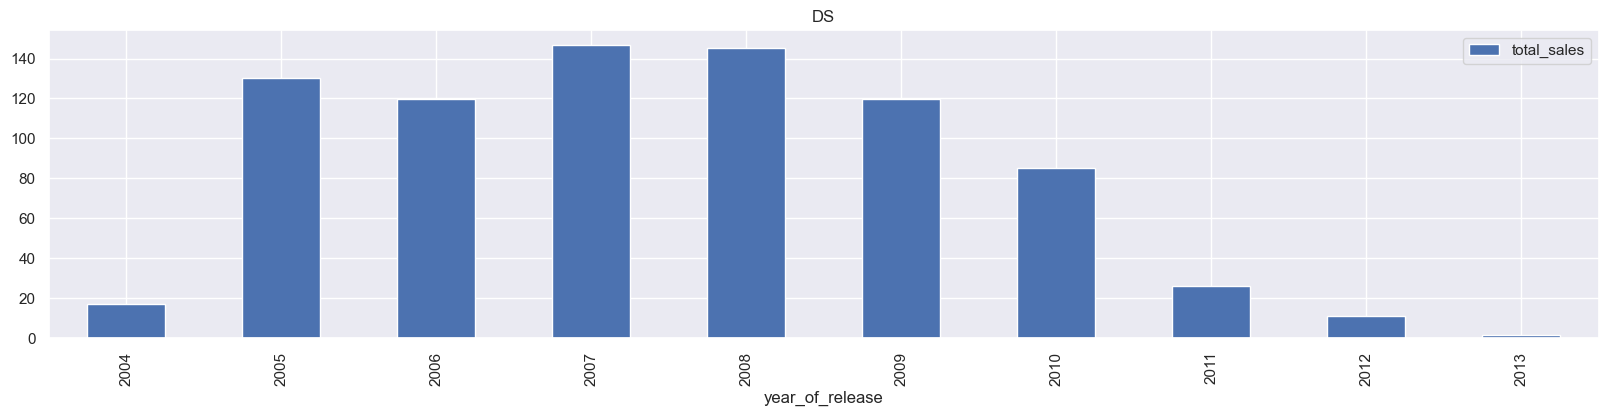

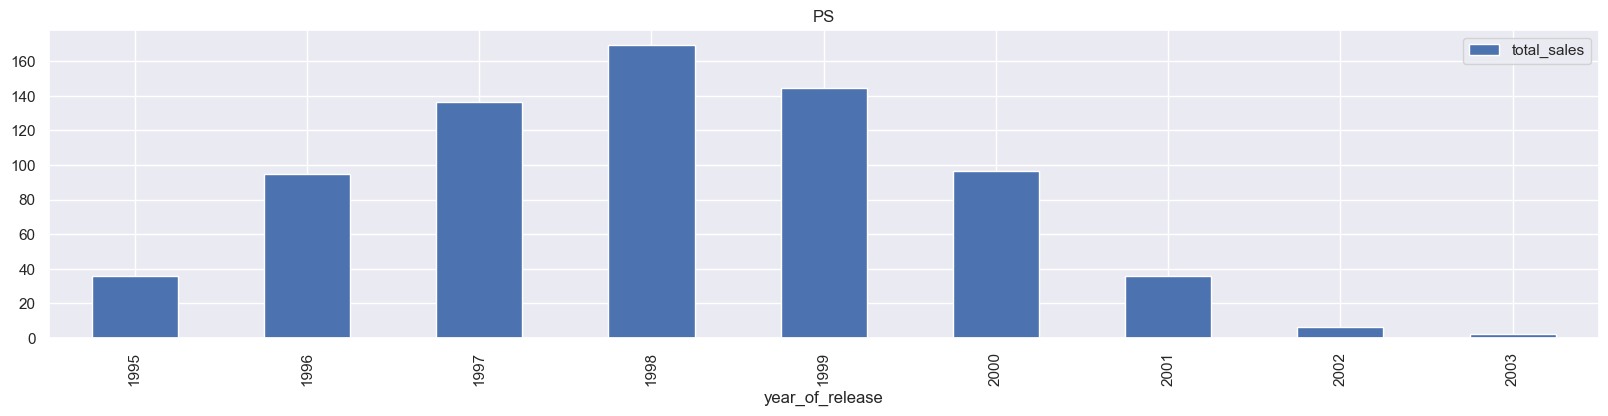

In [65]:
# цикл для формирования графиков по самым успешным 6 платформам
for platform in platform_sales.index[:6]:
    data[(data['platform'] == platform) & (data['year_of_release'] >= 1995)].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(20,4))
    plt.title(platform)

Визуализированы игровые платформы в порядке убывания их популярности у пользователей.  
Возглавляет список платформа "PS2". Топ 6 самых результативных также представлен на графиках.  
**PS2, DS, PS3, Wii, X360, PSP, PS** - подойдут для маркетингового исследования.  
Прослеживается жизненный цикл: старт, рост популярности и продаж, пик продаж, спад и угасание популярности. В среднем 8-10 лет у самых успешных платформ длится период существования.  
Стратегический прогноз продаж - достижение показателя в 160-200 млн шт в год проданных копий.  

#### Определение актуального периода и потенциально прибыльных платформ

Т.к. целью исследования является планирование успешной рекламной компании, оценивать лучше только лидеров. Опыт предыдущих площадок разумно изучать в период 8 лет, последние 1-2 года жизненного цикла можно актуальными не считать, т.к. это практически период вымирания. На этапе зрелости и спада обычно всё отработано и деятельность основана на инерции предыдущих лет.

Пристально стоит оценивать период роста - это от старта 2-3 года. Будем считать данный период АКТУАЛЬНЫМ. Все рекламные инвестиции логично реализовать в этот промежуток времени, далее уже напрасные вложения.

In [66]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(5), int32(1), object(6)
memory usage: 1.6+ MB


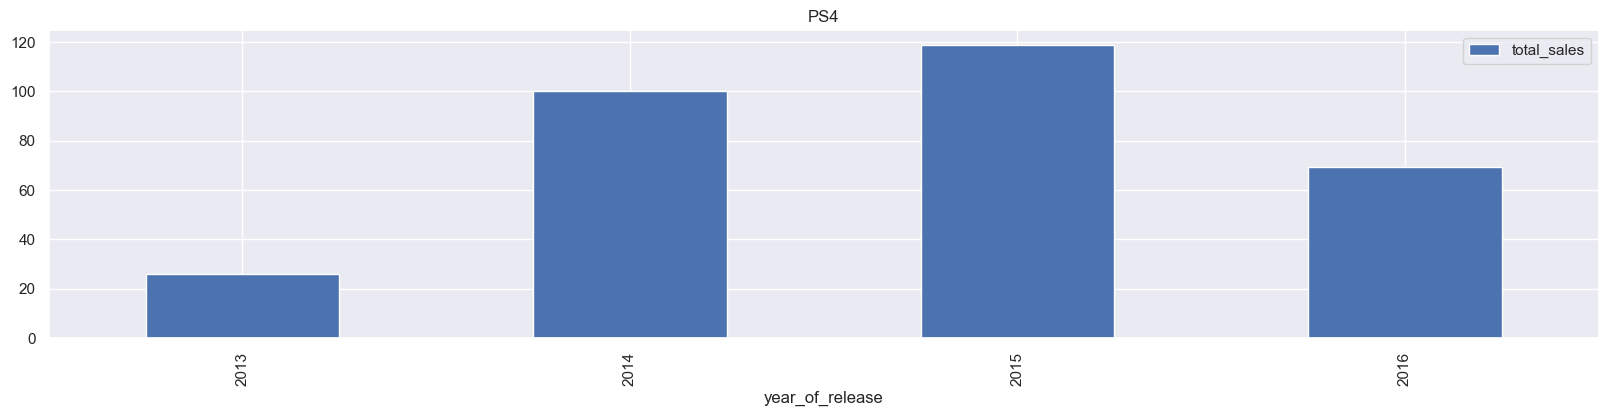

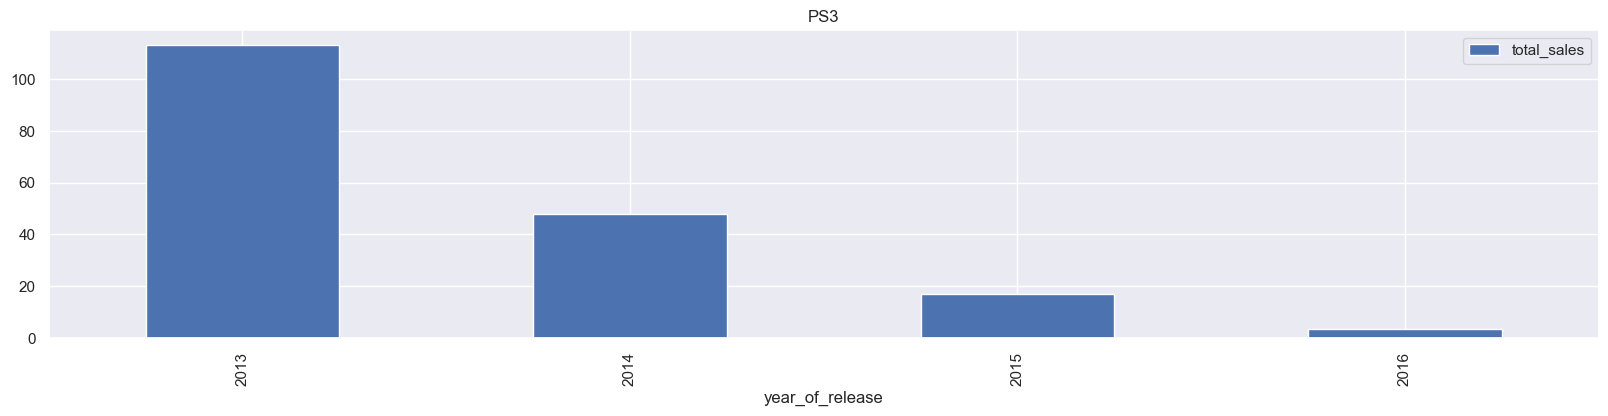

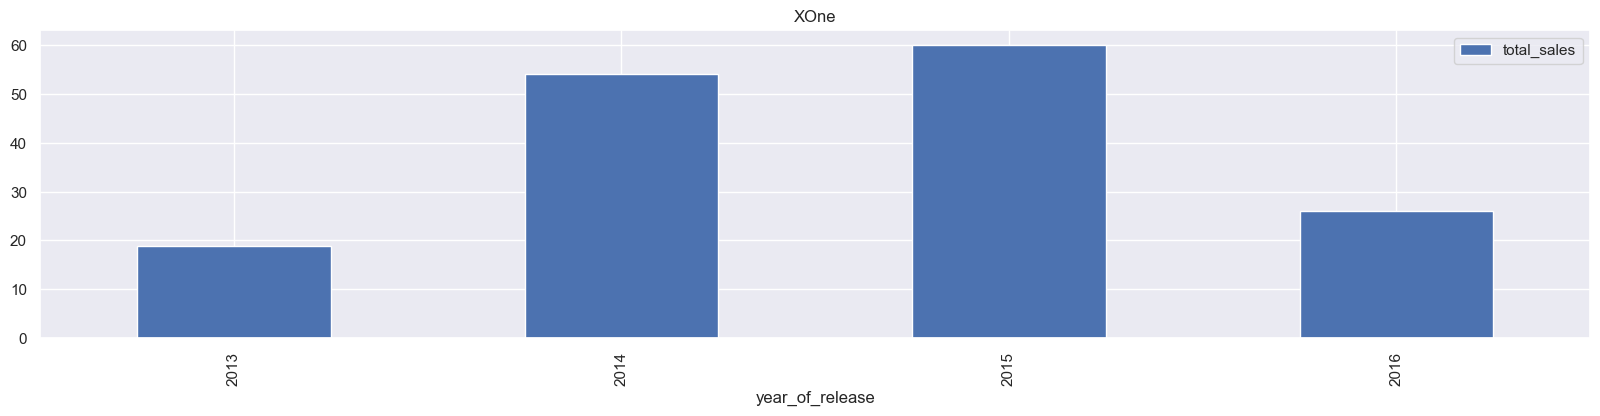

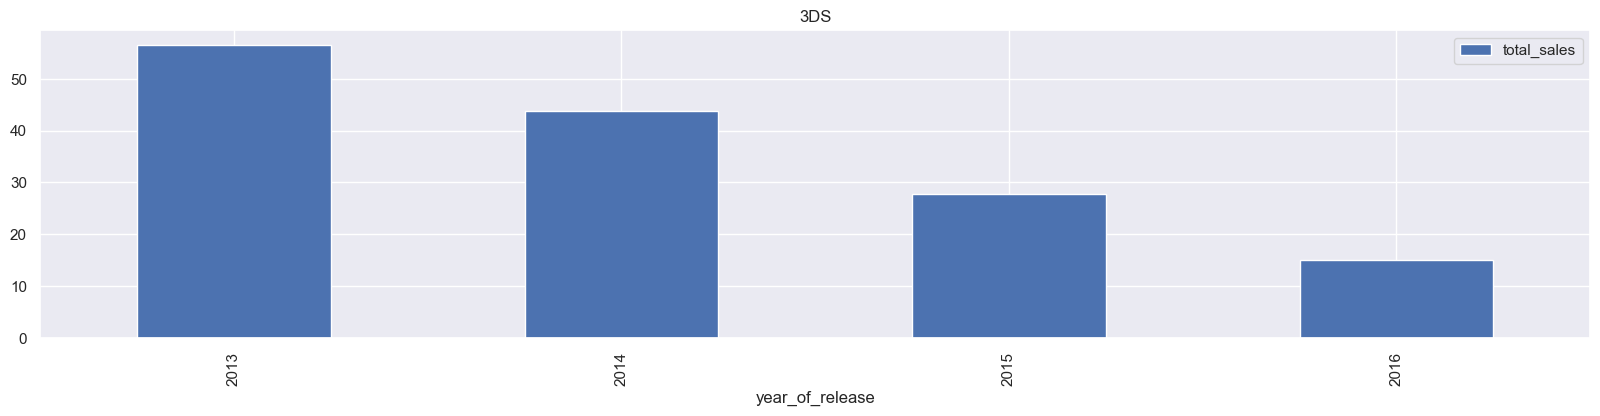

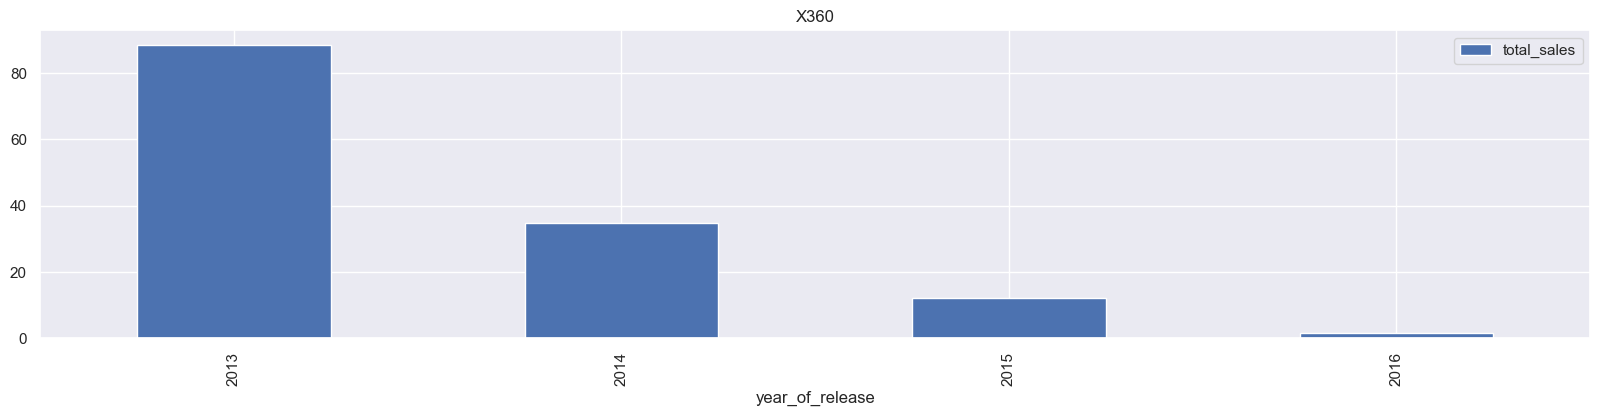

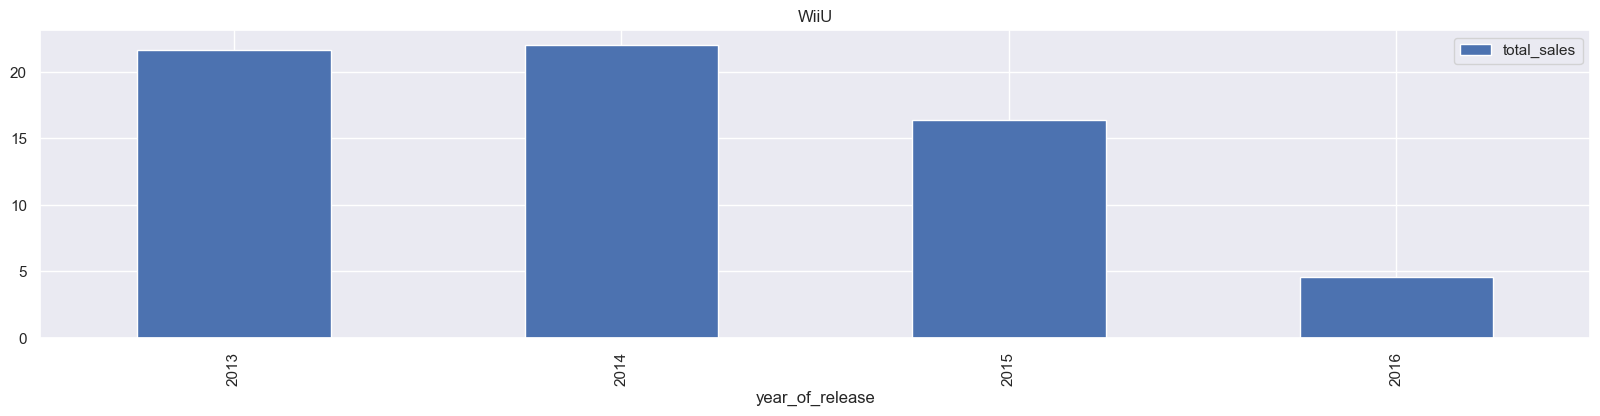

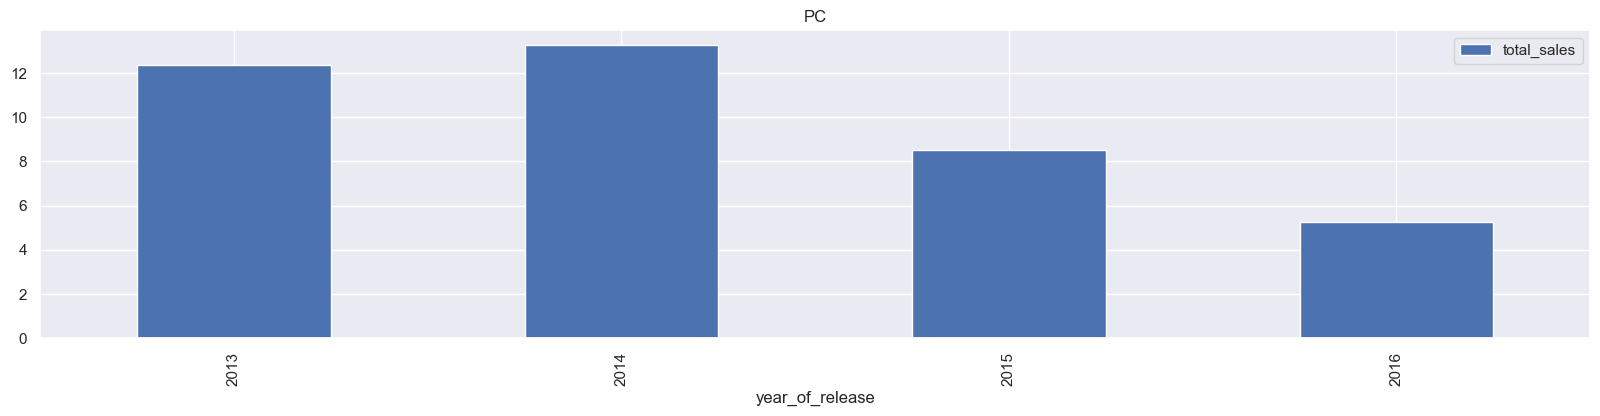

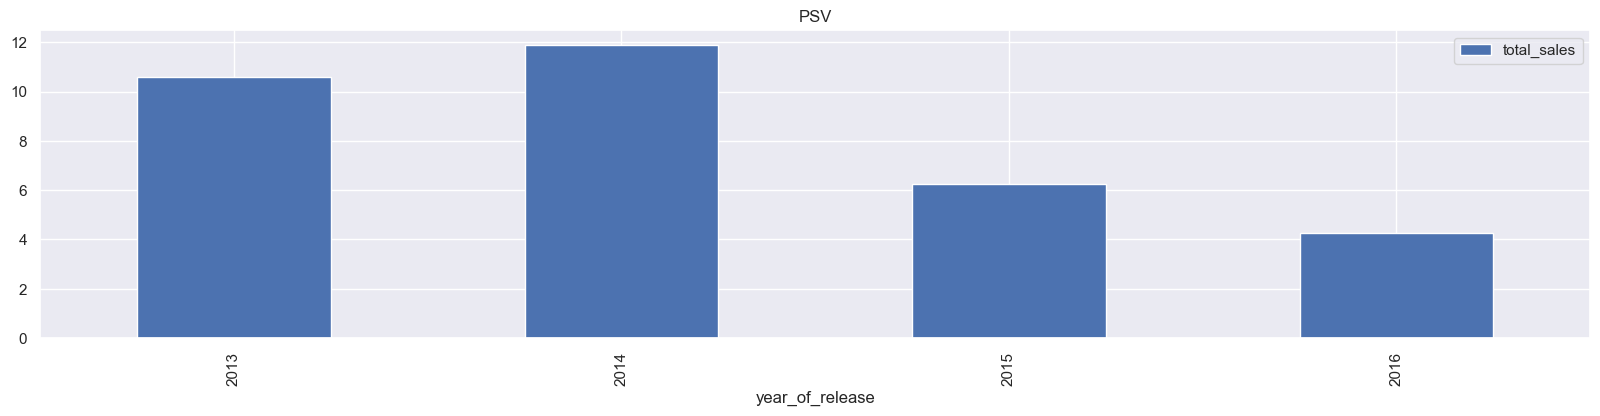

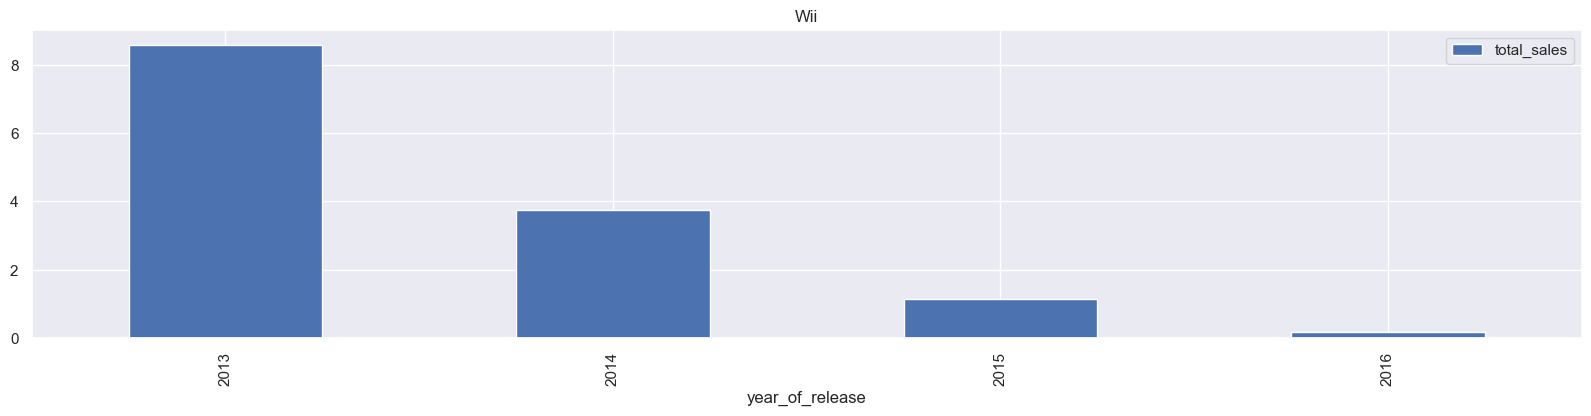

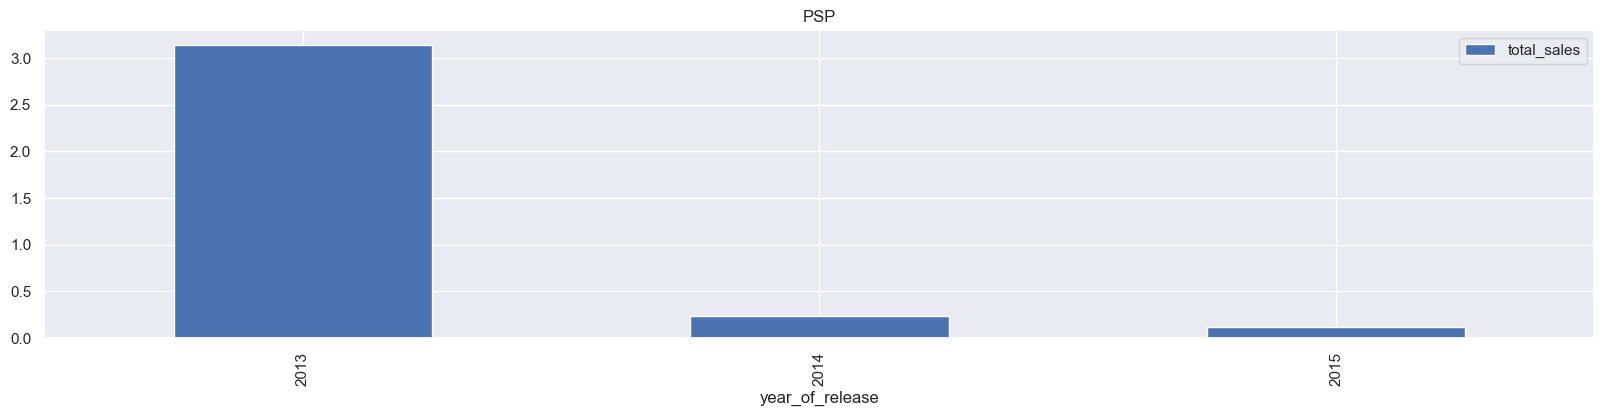

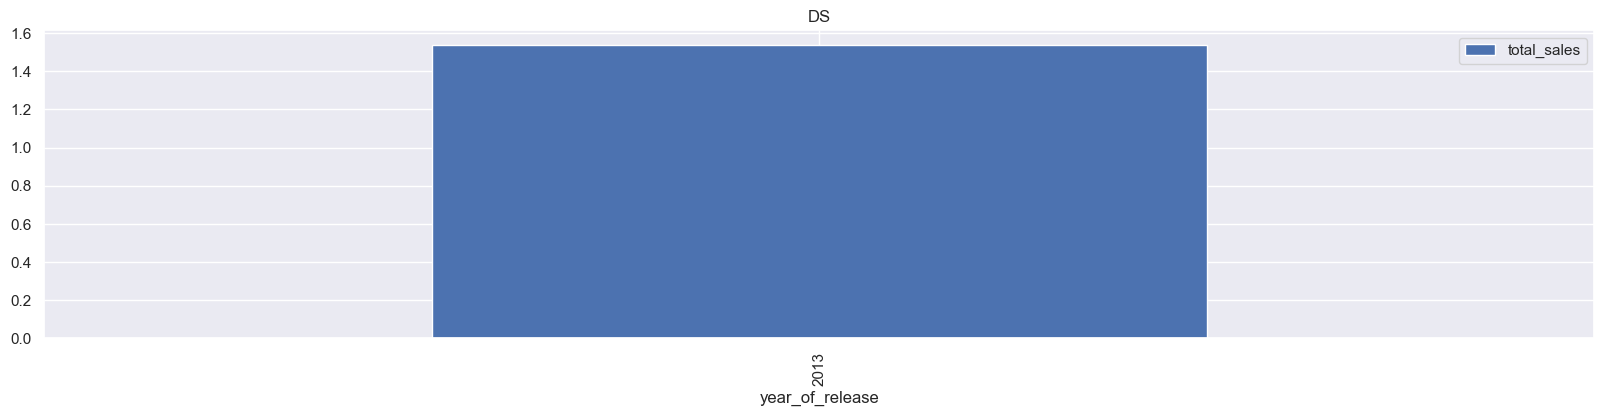

In [67]:
# фильтрация датафрейма с 2013 года
predict_data = data.loc[data['year_of_release'] > 2012]
# выявление перспективных платформ на момент исследования
new_platform_sales = (predict_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False))

for platform in new_platform_sales.index[:12]:
    predict_data[(predict_data['platform'] == platform)].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(20,4))
    plt.title(platform)

Учитывая предыдущие выводы о жизненном цикле, потенциально прибыльными стоит считать платформы, которые сейчас в начале жизненного цикла или приближенные к периоду зрелости. Помним, что данные за 2016 год неполные, на них не ориентируемся. 
Далее платформы выстроены порядке убывания от самой перспективной: **'PS4', 'XOne', 'WiiU', 'PSV'**-(с большой натяжкой).

<Axes: title={'center': 'Глобальные продажи игр в разбивке ТОП-платформам'}, xlabel='platform', ylabel='total_sales'>

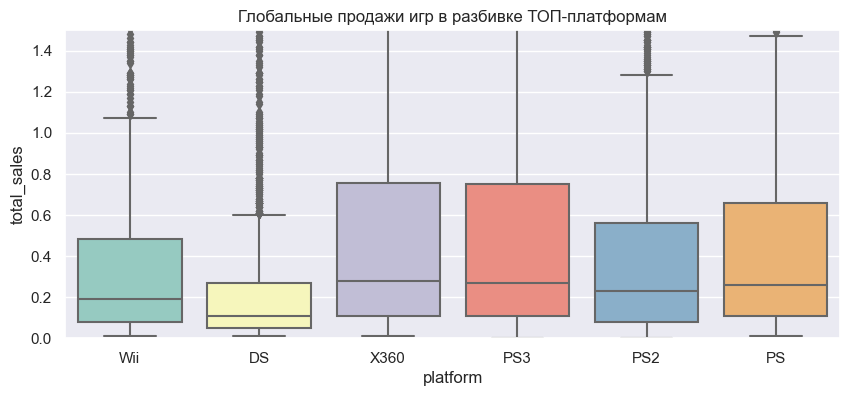

In [68]:
# датафрейм только для фокусных платформ
top_data = data.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne', 'WiiU', 'PSV']")

# выборка по ТОП - 6 лидеров продаж
top_data_sale = data.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']")[['platform', 'total_sales']]
plt.figure(figsize=(10,4))
plt.ylim(0,1.5)
plt.title('Глобальные продажи игр в разбивке ТОП-платформам')
sns.boxplot(data=top_data_sale, x='platform', y='total_sales', palette='Set3')

<Axes: title={'center': 'Глобальные продажи игр в разбивке по ПЕРСПЕКТИВНЫМ платформам'}, xlabel='platform', ylabel='total_sales'>

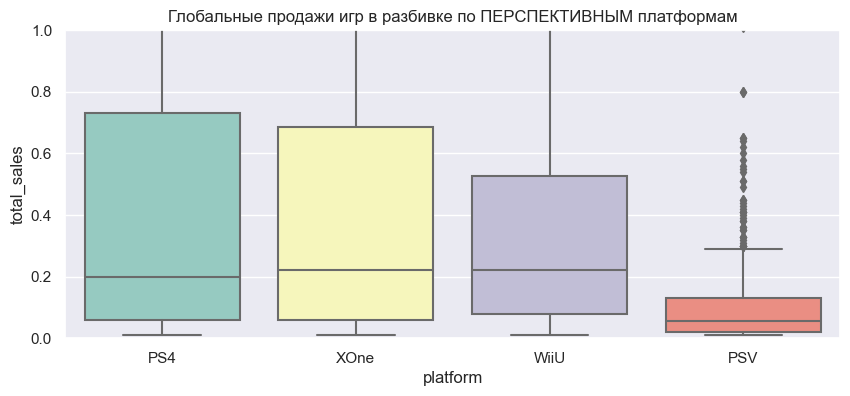

In [69]:
# выборка по перспективным платформам
top_data_future = data.query("platform in ['PS4', 'XOne', 'WiiU', 'PSV']")[['platform', 'total_sales']]
plt.figure(figsize=(10,4))
plt.ylim(0,1)
plt.title('Глобальные продажи игр в разбивке по ПЕРСПЕКТИВНЫМ платформам')
sns.boxplot(data=top_data_future, x='platform', y='total_sales', palette='Set3')

Нельзя сказать, что у ТОП-платформ одинаковые медианные значения, самыми яркими на рынке были 'X360', 'PS3' и 'PS'. В сравнении с ними прогноз для перспективных платформ 'PS4', 'XOne', 'WiiU' на 2017 г. вполне позитивный, тем более молодые платформы только подходят к пику своей популярности. И мрачные предчувствия о возможностях 'PSV' пока подтверждаются.  
Тенденция к снижению и стагнации популярности игровых платформ в целом тоже следует учитывать, возможно, это причина того, что в группу перспективных попало всего 3 платформы (в 2 раза меньше, чем количество ТОП).

#### Продажи и оценки (отзывы пользователей и критиков).

In [70]:
# df для оценок фокусных платформ
top_data_score = top_data.query("critic_score not in ['no_value','nan']")[['platform', 
                                                                           'critic_score', 'user_score', 'total_sales']]
top_data_score = top_data_score.query("user_score not in ['no_value','nan']")[['platform', 
                                                                           'critic_score', 'user_score', 'total_sales']]
# формат float
top_data_score['critic_score'] = pd.to_numeric(top_data_score['critic_score'])
top_data_score['user_score'] = pd.to_numeric(top_data_score['user_score'])

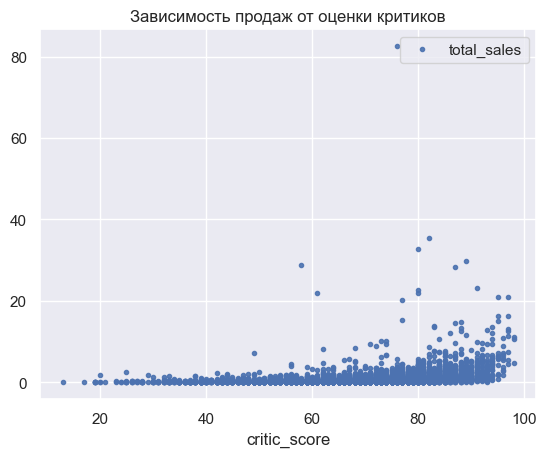

Коэффициент корреляции продаж от оценки критиков - 0.27


In [71]:
# платформа - оценка критиков - визуализация
top_data_score.plot(x='critic_score', y='total_sales',\
                  style='.', title='Зависимость продаж от оценки критиков',\
                  alpha=0.9, grid=True)
plt.show()

print('Коэффициент корреляции продаж от оценки критиков -', 
        round(top_data_score['critic_score'].corr(top_data_score['total_sales']), 2))

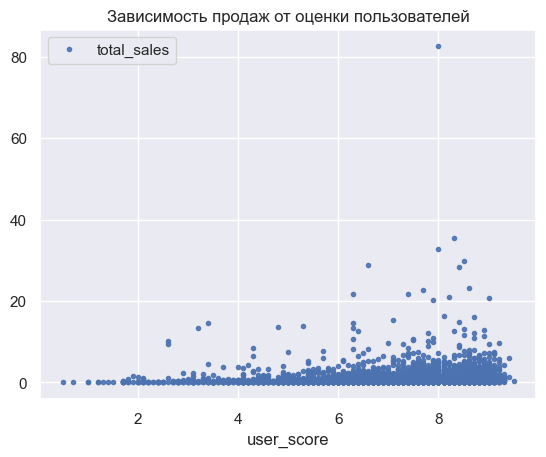

Коэффициент корреляции продаж от оценки пользователей - 0.1


In [72]:
# платформа - оценка пользователей - визуализация
top_data_score.plot(x='user_score', y='total_sales',\
                  style='.', title='Зависимость продаж от оценки пользователей',\
                  alpha=0.9, grid=True)
plt.show()

print('Коэффициент корреляции продаж от оценки пользователей -', 
        round(top_data_score['user_score'].corr(top_data_score['total_sales']), 2))

Взаимосвязь продаж от оценки пользователей и критиков ничтожно мала, это подтверждается и коэффициентами корреляции Пирсона. На первый взгляд при таких результатах не стоит полагаться на успех площадок в оценках.  

In [73]:
X_360_cr = top_data_score.query('platform == "X360"')
X_360_us = top_data_score.query('platform == "X360"')
print('X360 - Коэфф-т корреляции продажи-критики', round(X_360_cr['critic_score'].corr(X_360_cr['total_sales']), 2))
print('X360 - Коэфф-т корреляции продажи-пользователи', round(X_360_us['user_score'].corr(X_360_us['total_sales']), 2))

X360 - Коэфф-т корреляции продажи-критики 0.39
X360 - Коэфф-т корреляции продажи-пользователи 0.11


In [74]:
PS_3_cr = top_data_score.query('platform == "PS3"')
PS_3_us = top_data_score.query('platform == "PS3"')
print('PS3 - Коэфф-т корреляции продажи-критики', round(PS_3_cr['critic_score'].corr(PS_3_cr['total_sales']), 2))
print('PS3 - Коэфф-т корреляции продажи-пользователи', round(PS_3_us['user_score'].corr(PS_3_us['total_sales']), 2))

PS3 - Коэфф-т корреляции продажи-критики 0.43
PS3 - Коэфф-т корреляции продажи-пользователи 0.14


In [75]:
PS_cr = top_data_score.query('platform == "PS"')
PS_us = top_data_score.query('platform == "PS"')
print('PS - Коэфф-т корреляции продажи-критики', round(PS_cr['critic_score'].corr(PS_cr['total_sales']), 2))
print('PS - Коэфф-т корреляции продажи-пользователи', round(PS_us['user_score'].corr(PS_us['total_sales']), 2))

PS - Коэфф-т корреляции продажи-критики 0.43
PS - Коэфф-т корреляции продажи-пользователи 0.3


In [76]:
PS_4_cr = top_data_score.query('platform == "PS4"')
PS_4_us = top_data_score.query('platform == "PS4"')
print('PS4 - Коэфф-т корреляции продажи-критики', round(PS_4_cr['critic_score'].corr(PS_4_cr['total_sales']), 2))
print('PS4 - Коэфф-т корреляции продажи-пользователи', round(PS_4_us['user_score'].corr(PS_4_us['total_sales']), 2))

PS4 - Коэфф-т корреляции продажи-критики 0.41
PS4 - Коэфф-т корреляции продажи-пользователи -0.03


In [77]:
XOne_cr = top_data_score.query('platform == "XOne"')
XOne_us = top_data_score.query('platform == "XOne"')
print('XOne - Коэфф-т корреляции продажи-критики', round(XOne_cr['critic_score'].corr(XOne_cr['total_sales']), 2))
print('XOne - Коэфф-т корреляции продажи-пользователи', round(XOne_us['user_score'].corr(XOne_us['total_sales']), 2))

XOne - Коэфф-т корреляции продажи-критики 0.41
XOne - Коэфф-т корреляции продажи-пользователи -0.09


In [78]:
WiiU_cr = top_data_score.query('platform == "WiiU"')
WiiU_us = top_data_score.query('platform == "WiiU"')
print('WiiU - Коэфф-т корреляции продажи-критики', round(WiiU_cr['critic_score'].corr(WiiU_cr['total_sales']), 2))
print('WiiU - Коэфф-т корреляции продажи-пользователи', round(WiiU_us['user_score'].corr(WiiU_us['total_sales']), 2))

WiiU - Коэфф-т корреляции продажи-критики 0.35
WiiU - Коэфф-т корреляции продажи-пользователи 0.39


Если проверить зависимость оценок и продаж на каждой успешной платформе, то можно сделать следующие выводы:  
- оценки пользователей практически не влияют на успех продаж (исключение "WiiU", но это м.б. случайностью)  
- оценки критиков имеют более высокие значения коэфф-та Пирсона, но по ним также нельзя сделать вывод, что от них может зависеть успех рекламной компании на старте  
Возможно, критики могут быть вовлечены в маркетинговую компанию, но на этапе зрелости, как дополнительный ресурс.  
  
Оценка критиков имеет слабое влияние на продажи, оценка пользователей на продажи не влияет.

#### Жанровое разнообразие.

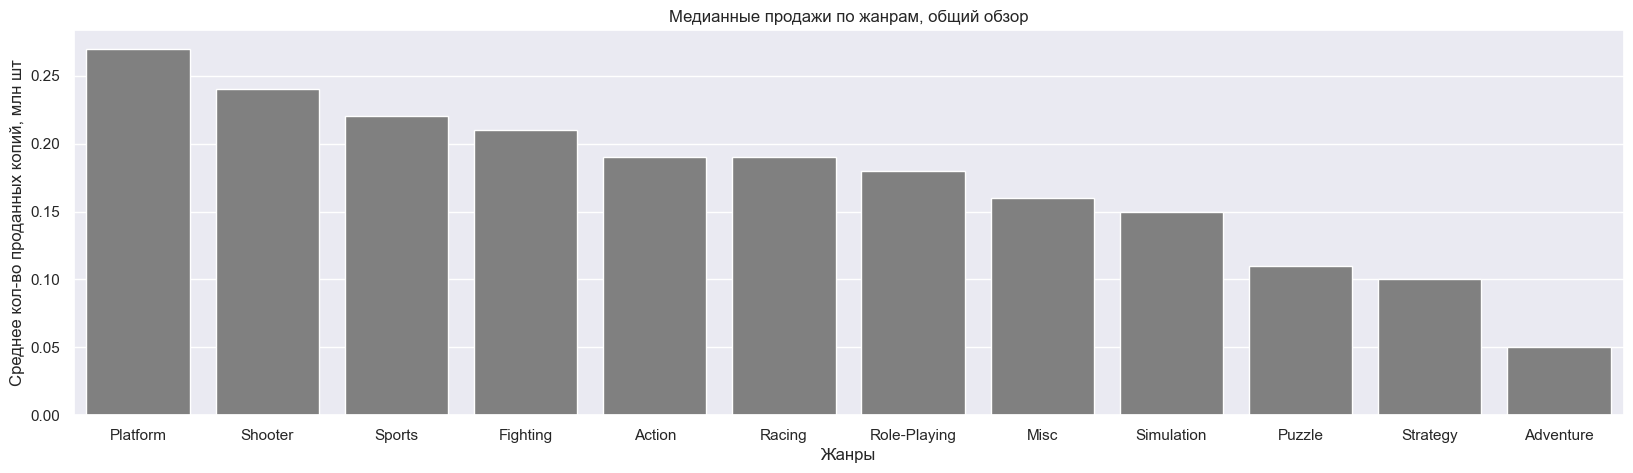

,median
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


In [79]:
# общая визуализация по жанрам
genre_sales = (data.pivot_table(index='genre', values='total_sales', aggfunc= 'median')
    .sort_values('total_sales', ascending=False))

plt.figure(figsize=(20, 5))
(sns.barplot(data = genre_sales, x = genre_sales.index, y = 'total_sales', color = 'grey')
    .set(title = 'Медианные продажи по жанрам, общий обзор', xlabel = 'Жанры', ylabel = 'Среднее кол-во проданных копий, млн шт'))
plt.show()

sales_g = pd.pivot_table(data, index='genre', values='total_sales', aggfunc=['median'])
sales_g.columns = ['median']
display(sales_g.sort_values('median', ascending=False))

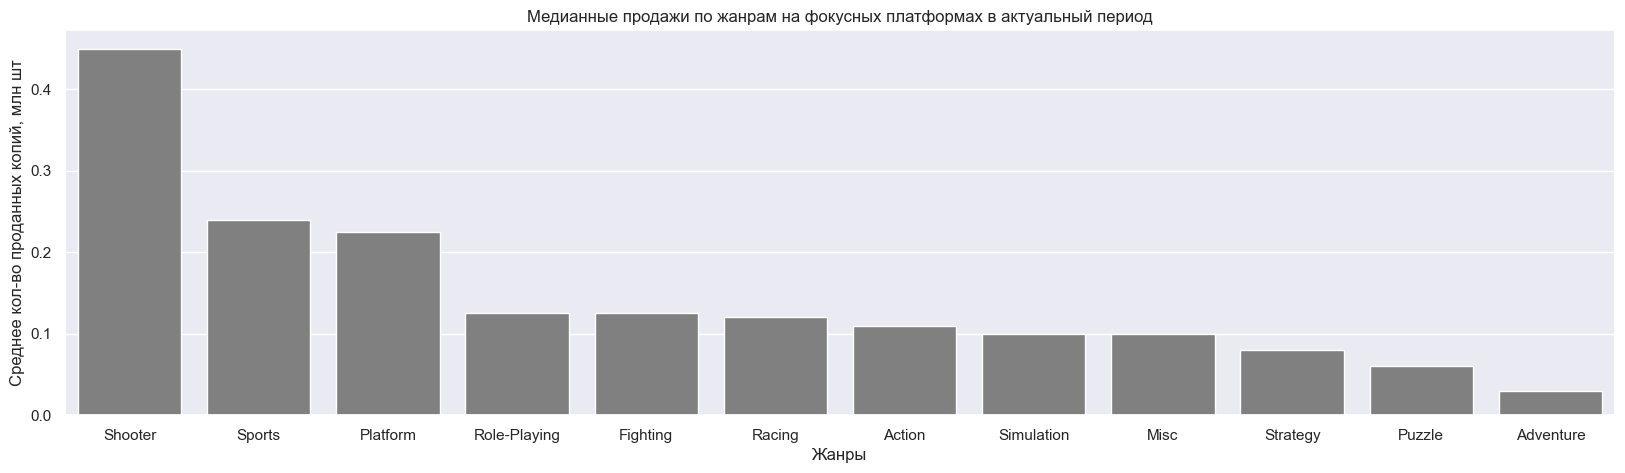

,median
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


In [80]:
# график по фокусным платформам
top_genre_sales = (predict_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values('total_sales', ascending=False))

plt.figure(figsize=(20, 5))
(sns.barplot(data = top_genre_sales, x = top_genre_sales.index, y = 'total_sales', color = 'grey')
    .set(title = 'Медианные продажи по жанрам на фокусных платформах в актуальный период', 
         xlabel = 'Жанры', ylabel = 'Среднее кол-во проданных копий, млн шт'))
plt.show()

tsales_g = pd.pivot_table(top_genre_sales, index='genre', values='total_sales', aggfunc=['median'])
tsales_g.columns = ['median']
display(tsales_g.sort_values('median', ascending=False))

ТОП-5 самых популярных жанров в общей исторической картине выглядит так:  
**genre----------median**  
Platform---------0.27  
Shooter----------0.24  
Sports------------0.22  
Fighting----------0.21  
Action------------0.19    
  
Но если выделить фокусные площадки в АКТУАЛЬНЫЙ период времени, то предпочтения немного иные:  
**genre------------median**   
Shooter------------0.450  
Sports--------------0.240  
Platform------------0.225  
Role-Playing------0.125  
Fighting------------0.125  

Планируя рекламную компанию, необходимо учитывать современные тренды в жанровых предпочтениях, самые топовые на момент исследования Shooter, Sports или Platform.  
Самые непопулярные жанры - это Adventure, Puzzle, Strategy.  
Также можно отметить, что с годами меняется менталитет игровой аудитории, что выражается в представленности жанров в ТОПе.

### Портрет пользователя.

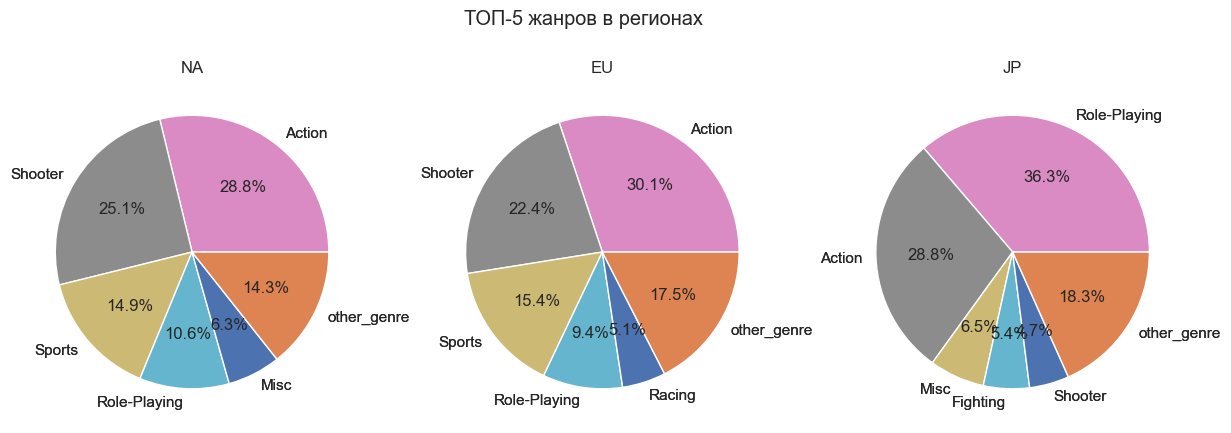

In [81]:
 # список регионов
regions = predict_data.columns[4:7]

# круговая диаграмма для каждого региона по жанрам
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')

for i in range(3):
  # 5 самых продающих жанров
  data_g = (predict_data.groupby('genre')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
    
  # оставшиеся продажи в other_genre
  data_g = data_g.append({'genre': 'other_genre', regions[i]: 
                          predict_data[regions[i]].sum() - data_g[regions[i]].sum()}, ignore_index= True)
  axs[i].pie(data_g[regions[i]], labels = data_g['genre'])
  axs[i].pie(data_g[regions[i]], labels = data_g['genre'], autopct='%1.1f%%')
    
  # название региона.
  axs[i].set_title(data_g.columns[1].split('_')[0].upper())
plt.show()

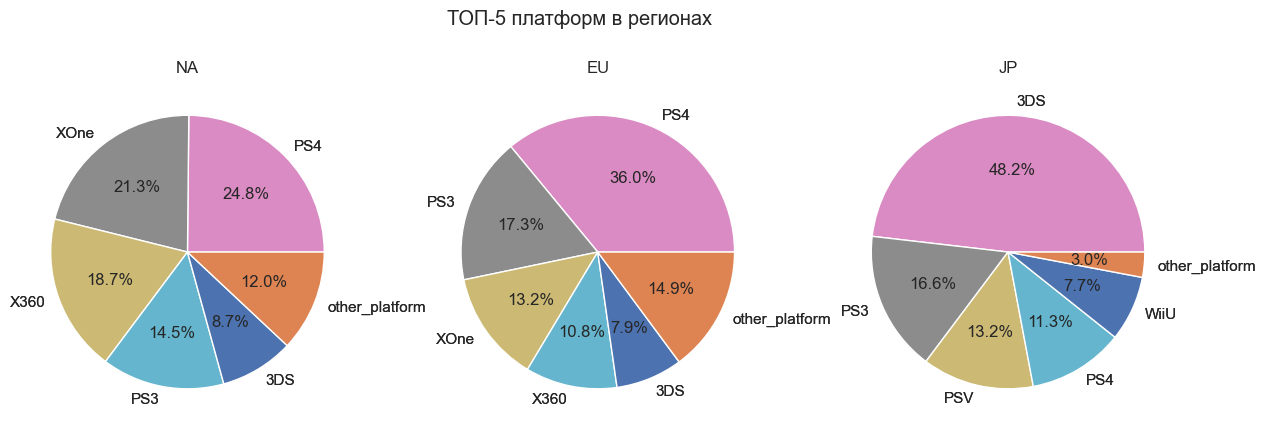

In [82]:
# круговая диаграмма для каждого региона по платформам
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')

for i in range(3):
  # 5 самых продающих платформ
  data_p = (predict_data.groupby('platform')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
    
  # оставшиеся продажи в other_platform
  data_p = data_p.append({'platform': 'other_platform', regions[i]: 
                          predict_data[regions[i]].sum() - data_p[regions[i]].sum()}, ignore_index= True)
  axs[i].pie(data_p[regions[i]], labels = data_p['platform'])
  axs[i].pie(data_p[regions[i]], labels = data_p['platform'], autopct='%1.1f%%')
    
  # название региона.
  axs[i].set_title(data_p.columns[1].split('_')[0].upper())
plt.show()

**Рейтинги ESRB**  
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»  
«T» («Teen») — «Подросткам 13—19 лет»  
«M» («Mature») — «От 17 лет»  
«K-A» — «Для детей и взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. 

In [83]:
# рейтинг по регионам с 2013 г.
ESRB = predict_data.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales','jp_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
no_value,78.91,85.05,89.42


In [84]:
# рейтинг по регионам по фокусным компаниям
ESRB_top = top_data.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales','jp_sales'], aggfunc = 'sum')
ESRB_top

,eu_sales,jp_sales,na_sales
rating,,,
E,578.20,144.89,990.07
E10+,156.32,32.20,303.03
EC,0.09,0.00,1.35
K-A,0.16,1.46,0.26
M,412.70,59.48,650.35
T,320.88,119.13,577.25
no_value,367.63,310.60,525.85


**Североамериканский пользователь:**  
Предпочитает жанры (в порядке убывания) - Action, Shooter, Sports  
Играет на платформах (в порядке убывания) - PS4, XOne, X360  
Категория по ESRB (в порядке убывания) - «M» — «От 17 лет», «E» — «Для всех», «E10+» — «Для всех старше 10 лет»  
Фокусные площадки по ESRB - «E» — «Для всех», «M» — «От 17 лет», «T» — «Подросткам 13—19 лет»  
  
**Европейский пользователь:**  
Предпочитает жанры (в порядке убывания) - Action, Shooter, Sports  
Играет на платформах (в порядке убывания) - PS4, PS3, XOne  
Категория по ESRB (в порядке убывания) - «M» — «От 17 лет», «E» — «Для всех», «T» — «Подросткам 13—19 лет»  
Фокусные площадки по ESRB - «E» — «Для всех», «M» — «От 17 лет», «T» — «Подросткам 13—19 лет»  
    
**Японский пользователь:**  
Предпочитает жанры (в порядке убывания) - Role-Playing и Action - значительно превалируют в игровых пристрастиях.  
Играет на платформах (в порядке убывания) - 3DS, PS3, PSV  
Категория по ESRB (в порядке убывания) - «E» — «Для всех», «T» — «Подросткам 13—19 лет», «M» — «От 17 лет»   
Фокусные площадки по ESRB -  «E» — «Для всех», «T» — «Подросткам 13—19 лет», «M» — «От 17 лет»  
  
Драйвером потребления является молодая мужская (судя по жанрам) аудитория. Американские и европейские пользователи более похожи в активности и предпочтениях. Японский рынок отличается пристрастием к ролевым играм и использует исключительно площадки своей страны.          

### Проверка гипотез.

In [85]:
# df для отработки гипотез
data_theory = predict_data.query("critic_score not in ['no_value','nan']")[
    ['platform', 'critic_score', 'user_score', 'genre', 'total_sales']]
data_theory = data_theory.query("user_score not in ['no_value','nan']")[
    ['platform', 'critic_score', 'user_score', 'genre', 'total_sales']]

# формат float
data_theory['critic_score'] = pd.to_numeric(data_theory['critic_score'])
data_theory['user_score'] = pd.to_numeric(data_theory['user_score'])

# df по платформам
XOne = data_theory.query("platform in ['XOne']")[['user_score']]
PC = data_theory.query("platform in ['PC']")[['user_score']]

# df по жанрам
Action = data_theory.query("genre in ['Action']")[['user_score']]
Sports = data_theory.query("genre in ['Sports']")[['user_score']]

In [86]:
# alpha = значение уровня значимости, т.е. 95% вероятности,что выводы верные
alpha = 0.05

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средний пользовательский рейтинг (user_score) платформы "XOne" = ср. польз. рейтингу (user_score) платформы "PC"  
H_a: Средний пользовательский рейтинг (user_score) платформы "XOne" ≠ ср. польз. рейтингу (user_score) платформы "PC"

In [87]:
print('Средний пользовательский рейтинг платформы Xbox One:', round(XOne.median(),2))
print('Средний пользовательский рейтинг платформы PC', round(PC.median(), 2))

Средний пользовательский рейтинг платформы Xbox One: user_score    6.8
dtype: float64
Средний пользовательский рейтинг платформы PC user_score    6.8
dtype: float64


In [88]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(XOne, PC, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [0.17882648]
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Гипотеза 1 подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC в актуальном периоде исследования одинаковые.

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

H_0: Средний пользовательский рейтинг (user_score) жанра "Action" = ср. польз. рейтингу (user_score) жанра "Sports"  
H_a: Средний пользовательский рейтинг (user_score) жанра "Action" ≠ ср. польз. рейтингу (user_score) жанра "Sports"

In [89]:
print('Средний пользовательский рейтинг жанра Action:', round(Action.median(), 2))
print('Средний пользовательский рейтинг жанра Sports', round(Sports.median(), 2))

Средний пользовательский рейтинг жанра Action: user_score    7.3
dtype: float64
Средний пользовательский рейтинг жанра Sports user_score    5.85
dtype: float64


In [90]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(Action, Sports, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: [1.049692e-13]
Отвергаем нулевую гипотезу


**Вывод:** Гипотеза 2 подтвердилась. Средние пользовательские рейтинги жанров Action и Sports разные.

**Заметки:**
Нулевая гипотеза всегда формулируется со знаком =  
Попадание или непопадание значения, посчитанного по выборке, в критический интервал - не повод считать, что наши гипотезы доказаны или нет. 
Иными словами, мы либо принимаем, либо не принимаем H₀(нулевую гипотезу).  
Данные лишь могут дать нам основания отвергнуть(или нет) H₀. Здесь вряд ли можно что-то подтвердить.

### Общий вывод.

Из данных исследования можно получить историческую картину развития гейм-отрасли на мировом рынке. На этапе зарождения по причине отсутствия глобального интернета динамика продаж была очень слабая. Резких положительный тренд наблюдался с 1995г. по 2009г. Это был период бурного расцвета, а также роста продаж и прибыли. На момент исследования распространённость количества предлагаемых продуктов стагнировалась. Можно предположить, что данный сегмент коммерческого рынка занял свою нишу, стабилизировался и регламентирован в правилах.  
  
Основными участниками рынка являются игровые платформы, на которых предлагаются игровые услуги (от создателей игр, игровых консолей), и потребители продукта - пользователи.  
Анализ игровых площадок показал, что все они имеют жизненный цикл в среднем 8-10 лет с чётким графиком роста, пика, спада и исчезновения. Связано это с тем, что это высокотехнологичный сегмент рынка, который требует постоянного усовершенствования и новаций. Игровые площадки морально устаревают и воссоздаются в новом поколении с новыми продуктами.  
  
Топ 6 самых результативных платформ: PS2, DS, PS3, Wii, X360, PSP, PS. На пике достигали продаж в 160-200 млн копий в год.  
Перспективные и потенциально прибыльные на текущий момент - 'PS4', 'XOne', 'WiiU'. Имеется тенденция к снижению и стагнации популярности игровых платформ, в количество крупных перспективных попало всего 3 (это в 2 раза меньше, чем в предыдущее десятиление). Прибыльность также прогнозно не превысит показатели предыдущих успешных площадок.  
  
Оценки пользователей и критиков практически не влияют на успех продаж, поэтому на старте рекламной компании этот ресурс использовать не рентабельно. Критики могут быть задействованы на этапе зрелости для вовлечения целевой аудитории.  
  
Самые популярные жанры игр - Action, Sports, Shooter и Role-Playing. Самые непопулярные жанры - это Adventure, Puzzle, Strategy. 
Различается  жанровый интерес аудитории по локациям, некоторые тематики игр имеют региональные отличия.  
  
В целом, американские и европейские пользователи более похожи в активности и предпочтениях. Японский рынок отличается пристрастием к ролевым играм и использует исключительно площадки своей страны.  
  
Стоит отметить, что интерес к площадкам "Xbox One" и "PC" оказался одинаковый, это подтверждают средние оценки пользователей. Т.к. для расчёта брался актуальный период, то интерпретировать такой результат можно интересом к растущим на данный момент новым играм. Также чтобы выдерживать жёсткую конкуренцию на данном рынке, нужно создавать креативный высокотехнологичный продукт, что влечёт за собой вовлечённость пользователей и хорошие оценки.  

Средние пользовательские рейтинги популярных жанров Action и Sports, тем не менее, разные. Это говорит о том, что игроки взыскательны и для удержания высокого рейтинга площадки необходимо поддерживать жанровое богатство предложений.
  
Всё вышеперечисленное свидетельствует о том, что при разработке стратегии маркетинговой кампании необходимо выстраивать её на разные сегменты аудитории и в несколько этапов.